In [168]:
#pip install graphviz
import pandas as pd
import numpy as np
import graphviz
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from matplotlib import pyplot as plt
from sklearn.metrics import auc, classification_report, confusion_matrix, roc_curve
from sklearn.metrics import roc_auc_score

In [87]:
path = "/Users/z0039kb/Documents/Projects/Stores/Mechanical_Shrink/output/cutveg_training/model_results/"

In [88]:
data_import = pd.read_excel(path+"cutveg_training_model_results.xlsx",sheet_name = "train_data")

In [133]:
data_import[:1]

,Yactual,YPredicted,Prob1,Prob2,co_loc_i,mdse_item_i,my_order,adj_appl_d,acct_wk_n,shrink_q,...,strreq_prcs_rat,totpush_totprcs_rat,mdshrtdtpush_totprcs_rat,mnshrtdtpush_totprcs_rat,shrtdtpush_totprcs_rat,snslpush_totprcs_rat,promopush_totprcs_rat,otherpush_totprcs_rat,leave_id,tag
0,0,0,0.947332,0.052668,437,1773041,4,2019-08-14,Aug Week 28,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,16,0


In [89]:
data_import['tag'] = data_import['Yactual'].replace(-1,1)

In [90]:
from sklearn.datasets import load_iris
from sklearn import tree

In [91]:
x_cols = ['fut_bal_2_rat', 'fut_bal_3_rat',
       'median_ord_7r_rat', 'median_lor_7r_rat', 'median_owb_7_rat',
       'median_ord_14r_rat', 'median_lor_14r_rat', 'days_sup_lor_rat',
       'pre_rec_amt_rat']

In [200]:
X = data_import[x_cols]
y = data_import.tag

In [201]:
X[:1]

,fut_bal_2_rat,fut_bal_3_rat,median_ord_7r_rat,median_lor_7r_rat,median_owb_7_rat,median_ord_14r_rat,median_lor_14r_rat,days_sup_lor_rat,pre_rec_amt_rat
0,0.0,0.0,1.0,1.142857,1.0,1.0,1.142857,0.428571,0.0


In [192]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify = y, random_state=1) # 70% training and 30% test

In [174]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [175]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.725494695354048


In [176]:
# Extract feature importance
wts        = clf.feature_importances_
fimp       = pd.DataFrame({'importance':(wts*100).round(2), 'feature':x_cols})
print("\n{0} features are non-zero...".format((fimp['importance']>0).sum()))
print("\nFeatures")
print(fimp[fimp['importance']>0].sort_values('importance', ascending=False).reset_index(drop=True))


9 features are non-zero...

Features
   importance             feature
0       40.32    days_sup_lor_rat
1       14.14   median_lor_7r_rat
2       11.54  median_lor_14r_rat
3        7.38  median_ord_14r_rat
4        7.29    median_owb_7_rat
5        6.38       fut_bal_3_rat
6        5.43     pre_rec_amt_rat
7        4.41       fut_bal_2_rat
8        3.10   median_ord_7r_rat


In [170]:
# Classify train, test, and all records
Ytrnpred = clf.predict(X_train)
Ytstpred = clf.predict(X_test)
#Yallpred = mdl.predict(Xall)

#adding the probability for each datapoint
prob_train = clf.predict_proba(X_train)

# Evaluate Model
print("Train Confusion Matrix")
print(confusion_matrix(y_train, Ytrnpred, labels=[0, 1]))
print(classification_report(y_train, Ytrnpred, labels=[0, 1]))

print("Test Confusion Matrix")
print(confusion_matrix(y_test, Ytstpred, labels=[0, 1]))
print(classification_report(y_test, Ytstpred, labels=[0, 1]))

dt_roc_auc = roc_auc_score(y_test, clf.predict_proba(X_test)[:,1])
print('ROC AUC: %0.2f' % dt_roc_auc)

Train Confusion Matrix
[[100219   9463]
 [  8954  54231]]
              precision    recall  f1-score   support

           0       0.92      0.91      0.92    109682
           1       0.85      0.86      0.85     63185

    accuracy                           0.89    172867
   macro avg       0.88      0.89      0.89    172867
weighted avg       0.89      0.89      0.89    172867

Test Confusion Matrix
[[45542  1465]
 [ 3856 23223]]
              precision    recall  f1-score   support

           0       0.92      0.97      0.94     47007
           1       0.94      0.86      0.90     27079

    accuracy                           0.93     74086
   macro avg       0.93      0.91      0.92     74086
weighted avg       0.93      0.93      0.93     74086

ROC AUC: 0.93


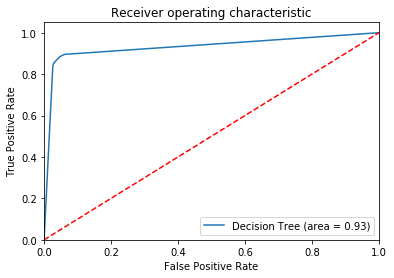

In [172]:
fpr, tpr, thresholds = roc_curve(y_test,  clf.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Decision Tree (area = %0.2f)' % dt_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [104]:
export_graphviz(clf,
                out_file      = '/Users/z0039kb/Documents/Projects/Stores/Mechanical_Shrink/output/cutveg_training/model_results/dtree_test.dot',
                feature_names = x_cols,
                class_names   = ['0', '1'],
                node_ids      = True,
                filled        = True,
                rounded       = True,
                rotate        = True,
                proportion    = True,
                precision     = 3)

In [134]:
def iv_woe(data, target, bins=10, show_woe=False):
    
    #Empty Dataframe
    newDF,woeDF = pd.DataFrame(), pd.DataFrame()
    
    #Extract Column Names
    cols = data.columns
    
    #Run WOE and IV on all the independent variables
    for ivars in cols[~cols.isin([target])]:
        if (data[ivars].dtype.kind in 'bifc') and (len(np.unique(data[ivars]))>10):
            binned_x = pd.qcut(data[ivars], bins,  duplicates='drop')
            d0 = pd.DataFrame({'x': binned_x, 'y': data[target]})
        else:
            d0 = pd.DataFrame({'x': data[ivars], 'y': data[target]})
        d = d0.groupby("x", as_index=False).agg({"y": ["count", "sum"]})
        d.columns = ['Cutoff', 'N', 'Events']
        d['% of Events'] = np.maximum(d['Events'], 0.5) / d['Events'].sum()
        d['Non-Events'] = d['N'] - d['Events']
        d['% of Non-Events'] = np.maximum(d['Non-Events'], 0.5) / d['Non-Events'].sum()
        d['WoE'] = np.log(d['% of Events']/d['% of Non-Events'])
        d['IV'] = d['WoE'] * (d['% of Events'] - d['% of Non-Events'])
        d.insert(loc=0, column='Variable', value=ivars)
        print("Information value of " + ivars + " is " + str(round(d['IV'].sum(),6)))
        temp =pd.DataFrame({"Variable" : [ivars], "IV" : [d['IV'].sum()]}, columns = ["Variable", "IV"])
        newDF=pd.concat([newDF,temp], axis=0)
        woeDF=pd.concat([woeDF,d], axis=0)

        #Show WOE Table
        if show_woe == True:
            print(d)
    return newDF, woeDF

In [148]:
%timeit div_wh(22000000,3)

410 ms ± 7.53 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [149]:
def div(num,den):
    a = int(num/den)
    op = num - (den*a
    return op

In [150]:
%timeit div(22000000,3)

260 ns ± 9.11 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [156]:
def fac(n):
    op = 1
    if n>0:
        op = n*fac(n-1)
    return op

In [157]:
fac(5)

120

In [158]:
def calculate_woe_iv(dataset, feature, target):
    '''
    Calculates the WOE and IV
    Returns (1) a dataframe with values in a column and WOE value
    Returns (2) final IV value
    '''
    lst = []
    for i in range(dataset[feature].nunique()):
        val = list(dataset[feature].unique())[i]
        lst.append({
            'Value': val,
            'All': dataset[dataset[feature] == val].count()[feature],
            'Good': dataset[(dataset[feature] == val) & (dataset[target] == 0)].count()[feature],
            'Bad': dataset[(dataset[feature] == val) & (dataset[target] == 1)].count()[feature]
        })
        
    dset = pd.DataFrame(lst)
    dset['Distr_Good'] = dset['Good'] / dset['Good'].sum()
    dset['Distr_Bad'] = dset['Bad'] / dset['Bad'].sum()
    dset['WoE'] = np.log(dset['Distr_Good'] / dset['Distr_Bad'])
    dset = dset.replace({'WoE': {np.inf: 0, -np.inf: 0}})
    dset['IV'] = (dset['Distr_Good'] - dset['Distr_Bad']) * dset['WoE']
    iv = dset['IV'].sum()
    #print(dset)
    dset = dset.sort_values(by='WoE')    
    return dset, iv

In [166]:
for col in x_cols:
    if col == 'Exited': continue
    else:
        print('WoE and IV for column: {}'.format(col))
        woe_df, iv = calculate_woe_iv(data_import, col, 'tag')
        #woe_df_total = pd.merge(bin_desc, woe_df, how='inner', left_on='Tier', right_on='Value')
        print(woe_df)
        print('IV score: {:.2f}'.format(iv))
        print('\n')

WoE and IV for column: fut_bal_2_rat


/Users/z0039kb/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


          Value    All   Good  Bad  Distr_Good  Distr_Bad       WoE        IV
790    0.838710      7      1    6    0.000006   0.000066 -2.343284  0.000141
729    0.717949      5      1    4    0.000006   0.000044 -1.937819  0.000074
689    0.405405      5      1    4    0.000006   0.000044 -1.937819  0.000074
202    0.864865      5      1    4    0.000006   0.000044 -1.937819  0.000074
393    0.701299      5      1    4    0.000006   0.000044 -1.937819  0.000074
..          ...    ...    ...  ...         ...        ...       ...       ...
503    0.120000      9      8    1    0.000051   0.000011  1.527917  0.000061
55     0.148148      9      8    1    0.000051   0.000011  1.527917  0.000061
214    0.100000      9      8    1    0.000051   0.000011  1.527917  0.000061
447    0.179104     11     10    1    0.000064   0.000011  1.751061  0.000092
13  -100.000000  16376  15566  810    0.099343   0.008974  2.404286  0.217274

[1276 rows x 8 columns]
IV score: 0.32


WoE and IV for column:

/Users/z0039kb/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


           Value    All   Good  Bad  Distr_Good  Distr_Bad       WoE        IV
875     0.838710      7      1    6    0.000006   0.000066 -2.343284  0.000141
924     0.741573      7      1    6    0.000006   0.000066 -2.343284  0.000141
1158    0.831683      6      1    5    0.000006   0.000055 -2.160962  0.000106
677     0.420000      5      1    4    0.000006   0.000044 -1.937819  0.000074
762     0.433735      5      1    4    0.000006   0.000044 -1.937819  0.000074
...          ...    ...    ...  ...         ...        ...       ...       ...
349     0.246575      8      7    1    0.000045   0.000011  1.394386  0.000047
387     0.423529     10      9    1    0.000057   0.000011  1.645700  0.000076
120     0.795181     10      9    1    0.000057   0.000011  1.645700  0.000076
233     0.100000     14     13    1    0.000083   0.000011  2.013425  0.000145
14   -100.000000  16376  15566  810    0.099343   0.008974  2.404286  0.217274

[1425 rows x 8 columns]
IV score: 0.34


WoE and IV

/Users/z0039kb/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


         Value  All  Good  Bad  Distr_Good  Distr_Bad       WoE        IV
131  11.000000   39     2   37    0.000013   0.000410 -3.469295  0.001378
116  14.000000   18     1   17    0.000006   0.000188 -3.384738  0.000616
65    9.000000  101     7   94    0.000045   0.001041 -3.148909  0.003139
43    5.333333   14     1   13    0.000006   0.000144 -3.116474  0.000429
115  13.000000   21     2   19    0.000013   0.000210 -2.802816  0.000554
..         ...  ...   ...  ...         ...        ...       ...       ...
82    0.125000   27    24    3    0.000153   0.000033  1.527917  0.000183
86    0.888889   13    12    1    0.000077   0.000011  1.933382  0.000127
77    0.714286   19    18    1    0.000115   0.000011  2.338848  0.000243
81    1.125000   20    19    1    0.000121   0.000011  2.392915  0.000264
61    0.428571   25    24    1    0.000153   0.000011  2.626530  0.000373

[224 rows x 8 columns]
IV score: 0.21


WoE and IV for column: median_lor_7r_rat


/Users/z0039kb/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


        Value  All  Good  Bad  Distr_Good  Distr_Bad       WoE        IV
117  0.100000   16     1   15    0.000006   0.000166 -3.259574  0.000521
69   0.000000  363    28  335    0.000179   0.003711 -3.033450  0.010716
100  0.125000   52     5   47    0.000032   0.000521 -2.792234  0.001365
74   0.461538   37     4   33    0.000026   0.000366 -2.661737  0.000905
116  0.466667   15     2   13    0.000013   0.000144 -2.423326  0.000318
..        ...  ...   ...  ...         ...        ...       ...       ...
63   1.454545   30    28    2    0.000179   0.000022  2.087533  0.000327
52   1.857143  408   385   23    0.002457   0.000255  2.266225  0.004991
92   2.285714   42    40    2    0.000255   0.000022  2.444208  0.000570
49   1.555556  160   153    7    0.000976   0.000078  2.533004  0.002277
75   2.333333   31    30    1    0.000191   0.000011  2.849673  0.000514

[126 rows x 8 columns]
IV score: 0.65


WoE and IV for column: median_owb_7_rat


/Users/z0039kb/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


         Value    All   Good    Bad  Distr_Good  Distr_Bad       WoE  \
26    1.285714      6      2      4    0.000013   0.000044 -1.244671   
37    1.600000     24      8     16    0.000051   0.000177 -1.244671   
9     3.000000   4278   1708   2570    0.010901   0.028472 -0.960107   
23    1.142857     32     13     19    0.000083   0.000210 -0.931014   
29    2.500000    332    137    195    0.000874   0.002160 -0.904543   
35    1.750000     54     23     31    0.000147   0.000343 -0.850017   
34    0.875000      9      4      5    0.000026   0.000055 -0.774668   
16    1.400000    188     85    103    0.000542   0.001141 -0.743602   
24    1.666667   1507    694    813    0.004429   0.009007 -0.709783   
3     2.000000  31688  15326  16362    0.097812   0.181268 -0.616935   
2     1.500000  17169   8317   8852    0.053080   0.098068 -0.613866   
39    2.333333     20     10     10    0.000064   0.000111 -0.551524   
38    5.000000      2      1      1    0.000006   0.000011 -0.55

/Users/z0039kb/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


         Value  All  Good  Bad  Distr_Good  Distr_Bad       WoE        IV
169  13.000000   17     1   16    0.000006   0.000177 -3.324113  0.000568
91    9.000000   93     6   87    0.000038   0.000964 -3.225673  0.002986
172  14.000000   14     1   13    0.000006   0.000144 -3.116474  0.000429
63    7.000000  250    18  232    0.000115   0.002570 -3.107890  0.007631
200  11.000000   26     2   24    0.000013   0.000266 -3.036431  0.000769
..         ...  ...   ...  ...         ...        ...       ...       ...
121   0.125000   17    16    1    0.000102   0.000011  2.221064  0.000202
126   0.625000   18    17    1    0.000108   0.000011  2.281689  0.000222
89    1.400000   19    18    1    0.000115   0.000011  2.338848  0.000243
110   0.375000   25    24    1    0.000153   0.000011  2.626530  0.000373
116   0.363636   36    35    1    0.000223   0.000011  3.003824  0.000638

[318 rows x 8 columns]
IV score: 0.26


WoE and IV for column: median_lor_14r_rat


/Users/z0039kb/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


        Value  All  Good  Bad  Distr_Good  Distr_Bad       WoE        IV
109  0.100000   24     1   23    0.000006   0.000255 -3.687018  0.000916
62   0.000000  363    28  335    0.000179   0.003711 -3.033450  0.010716
114  0.090909    8     1    7    0.000006   0.000078 -2.497434  0.000178
101  0.461538   43     6   37    0.000038   0.000410 -2.370683  0.000881
106  0.111111   28     4   24    0.000026   0.000266 -2.343284  0.000563
..        ...  ...   ...  ...         ...        ...       ...       ...
57   1.454545   37    34    3    0.000217   0.000033  1.876224  0.000345
46   1.555556  223   207   16    0.001321   0.000177  2.008606  0.002298
60   2.166667   42    39    3    0.000249   0.000033  2.013425  0.000434
43   1.444444  775   720   55    0.004595   0.000609  2.020394  0.008053
56   1.857143  327   304   23    0.001940   0.000255  2.030009  0.003421

[124 rows x 8 columns]
IV score: 0.67


WoE and IV for column: days_sup_lor_rat


/Users/z0039kb/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


          Value  All  Good  Bad  Distr_Good  Distr_Bad       WoE        IV
7484   2.411111   19     1   18    0.000006   0.000199 -3.441896  0.000664
3084   3.718750   33     2   31    0.000013   0.000343 -3.292364  0.001089
11640  4.857143   15     1   14    0.000006   0.000155 -3.190582  0.000474
12950  2.288462   15     1   14    0.000006   0.000155 -3.190582  0.000474
13296  4.222222   13     1   12    0.000006   0.000133 -3.036431  0.000384
...         ...  ...   ...  ...         ...        ...       ...       ...
2352   0.189189   39    38    1    0.000243   0.000011  3.086062  0.000714
3144   0.148148   40    39    1    0.000249   0.000011  3.112037  0.000740
1038   0.257895   42    41    1    0.000262   0.000011  3.162048  0.000792
872    0.221053   44    43    1    0.000274   0.000011  3.209676  0.000845
1732   0.202899   48    47    1    0.000300   0.000011  3.298623  0.000953

[19033 rows x 8 columns]
IV score: 0.94


WoE and IV for column: pre_rec_amt_rat
         Value  Al

/Users/z0039kb/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [185]:
# importing the required libraries
import numpy as np
from sklearn.model_selection import KFold

'''# create a sample dataset
X = np.array([[1, 2, 3, 2],
             [3, 4, 1, 1],
             [1, 2, 1, 1],
             [3, 4, 1, 1]])

y = np.array([1, 2, 3, 4])
'''
X = X_train
y = y_train
# create the object of the KFold
kf = KFold(n_splits=2)

print(kf)
#KFold(n_splits=2, random_state=None, shuffle=False)

for train_index, test_index in kf.split(X):
  print("TRAIN:", train_index, "TEST:", test_index)    
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]


kf = KFold(n_splits=3)
print(kf)
#KFold(n_splits=3, random_state=None, shuffle=False)
for train_index, test_index in kf.split(X):
  print("TRAIN:", train_index, "TEST:", test_index)    
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]

KFold(n_splits=2, random_state=None, shuffle=False)
TRAIN: [2 3] TEST: [0 1]
TRAIN: [0 1] TEST: [2 3]
KFold(n_splits=3, random_state=None, shuffle=False)
TRAIN: [2 3] TEST: [0 1]
TRAIN: [0 1 3] TEST: [2]
TRAIN: [0 1 2] TEST: [3]


# dt with change in parameter

In [ ]:
dt_params = {'class_weight'      : 'balanced',
             'min_impurity_decrease' : 0.0005,
             'random_state'          : seedval}
'''    
    
print("Seed Value: {}".format(seedval))

print("Training Decision Tree with Parameters:")
for item in dt_params.items():
    print(item)



# Define and Fit Model
mdl        = DecisionTreeClassifier(**dt_params)
mdl.fit(Xtrn, Ytrn)

In [202]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
X_rf, y_rf = make_classification(n_samples=1000, n_features=4,
                            n_informative=2, n_redundant=0,
                            random_state=0, shuffle=False)
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_rf, y_rf)
RandomForestClassifier(...)
print(clf.predict([[0, 0, 0, 0]]))

[1]


In [206]:
len(y_rf)

1000

In [213]:
a = [11,2,35]

In [214]:
for i in a:
    print(i)

11
2
35


In [222]:
n = 3

In [224]:
for i in range((n)):
    op = i + (i-1)

In [238]:
op = 1
def fib(n):
    op = 1
    if n>1:
        op = fib(n-2) +fib(n-1)
    return op

In [241]:
fib(6)

13